In [11]:
from   network_class import Network as Net
import matplotlib.pyplot as plt
import numpy as np
import time
from   utils import *

# markers color 
colors_c = np.array(['tab:blue','tab:green','k','w','c'])
colors_s = np.array(['tab:green', 'tab:blue'])

# layout for subplots
layout = [[0,1],
          [2,2]]


Npoints2D = 200
xy        = np.linspace(-1,1,Npoints2D)
X1,X2     = np.meshgrid(xy,xy)

## Get Train data

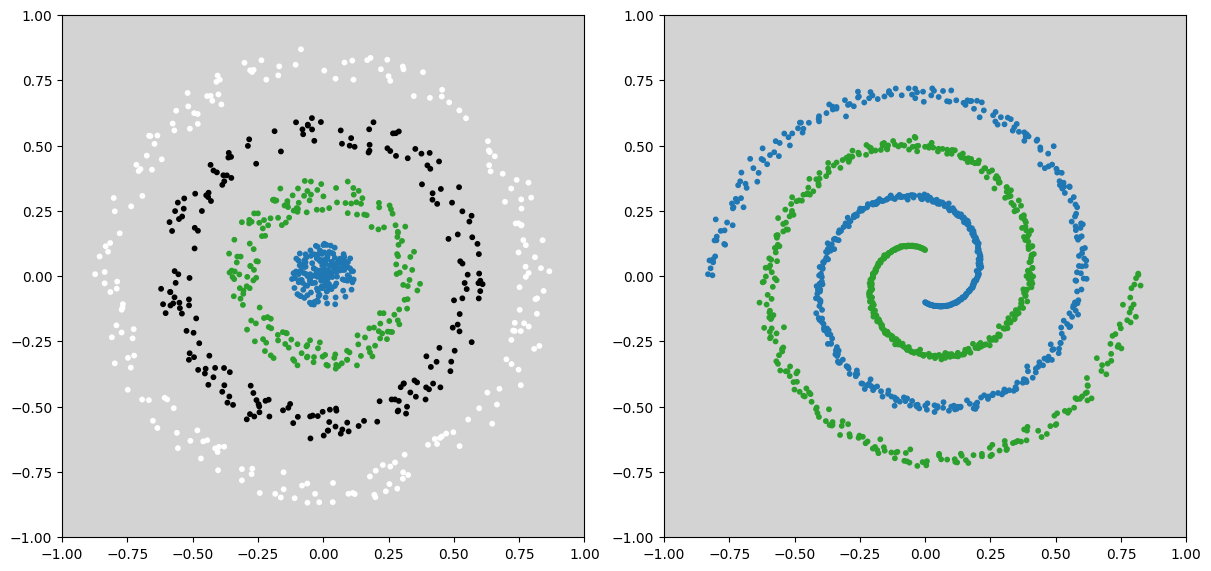

In [12]:
Nrings              = 4
train_data_c, Mxy_c = get_circles(Npts=200,k=0.5,Nrings=Nrings)
train_data_s, Mxy_s = get_double_spiral(a=0.4,n_turns=2,pts_turn=300,knoise=0.01)
size   = 600
fig,ax = plt.subplots(1,2,figsize=(2*px2inch*size, px2inch*size),constrained_layout=True)

markers_size = 10
ax[0].scatter(Mxy_c[:,0],Mxy_c[:,1],c=colors_c[Mxy_c[:,2].astype(int)],s=markers_size)
ax[0].set_aspect(1);ax[0].set_xlim(-1,1);ax[0].set_ylim(-1,1)
ax[0].set_facecolor("lightgray")

ax[1].scatter(Mxy_s[:,0],Mxy_s[:,1],c=colors_c[Mxy_s[:,2].astype(int)],s=markers_size)
ax[1].set_aspect(1);ax[1].set_xlim(-1,1);ax[1].set_ylim(-1,1)
ax[1].set_facecolor("lightgray")

plt.show()

In [13]:
layers          = [2,100,Nrings]
epochs          = 100
mini_batch_size = 1
eta             = 1.2
net             = Net(layers,X1,X2)
train_results_c = net.SGD(train_data_c, epochs, mini_batch_size, eta, eval_2D_train=False,test_data=train_data_c)


Neural Network Train Start
Neural Network Train End: Lapse Time: 6.216 s


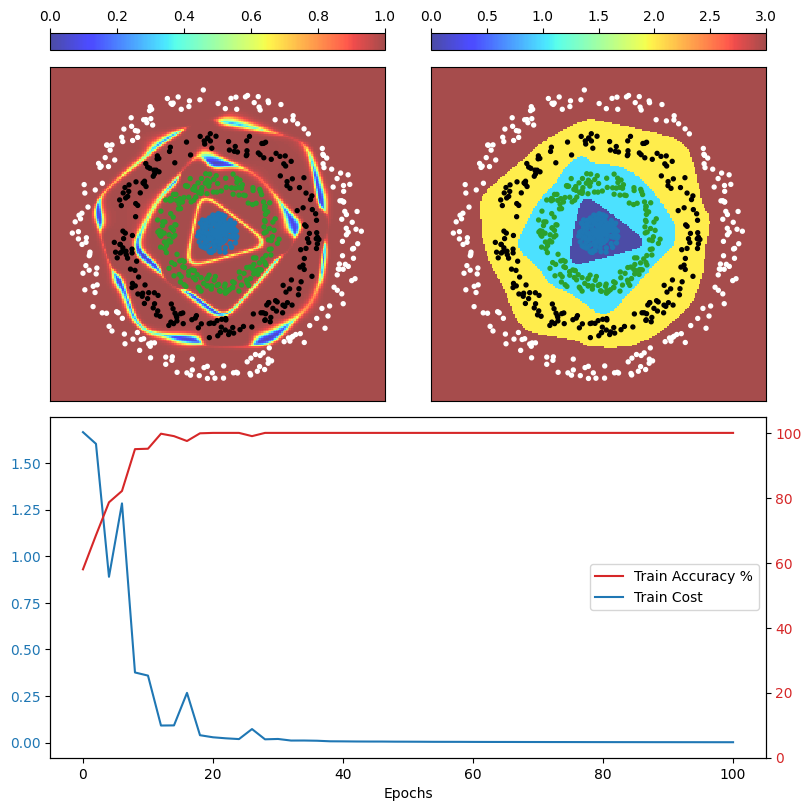

In [17]:

size     = 800
fig1, ax = plt.subplot_mosaic(layout,figsize=(px2inch*size, px2inch*size),constrained_layout=True)
ind      = [0,1,2]
cmap_c   = colors_c[Mxy_c[:,2].astype(int)]
subplot_check_rect(fig,ax,ind,cmap_c,Mxy_c,X1,X2,train_results_c,alphaMesh=0.7,sizeMarkers=8,cmap_con='jet',cmap_dis='jet')
                   
save_fig1 = False
if save_fig1:
   fig1.savefig(f'imgs/circle_{random_str(length=5)}.png', dpi=300)


In [ ]:
layers          = [2,120,2]
epochs          = 200
mini_batch_size = 1
eta             = 0.8
net             = Net(layers,X1,X2)
train_results_s = net.SGD(train_data_s, epochs, mini_batch_size, eta, eval_2D_train=False,test_data=train_data_s)

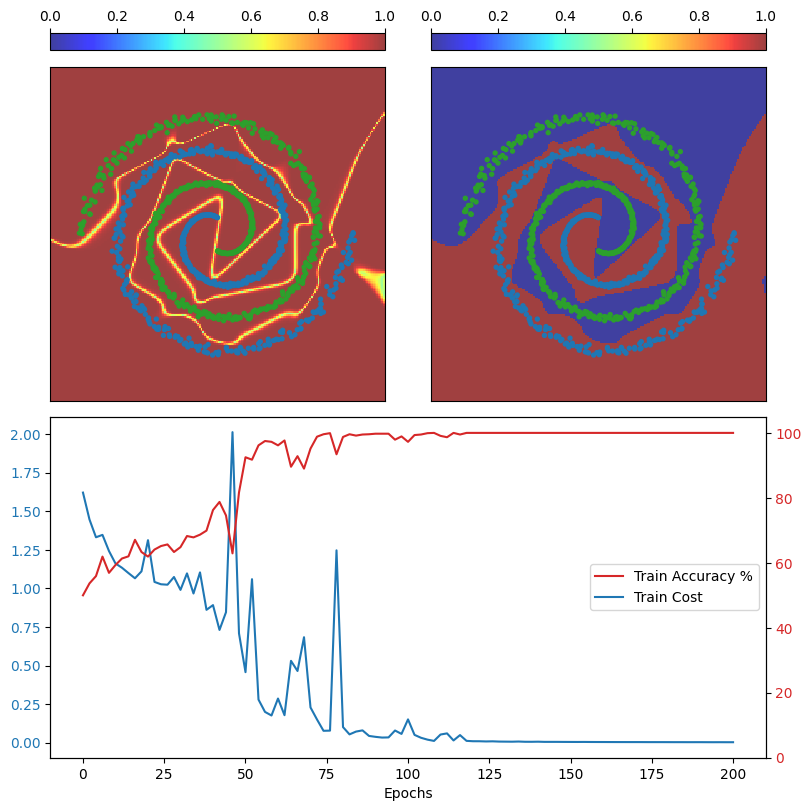

In [19]:
size    = 800
fig2, ax = plt.subplot_mosaic(layout,figsize=(px2inch*size, px2inch*size),constrained_layout=True)
ind      = [0,1,2]
cmap_s   = colors_s[Mxy_s[:,2].astype(int)]
subplot_check_rect(fig,ax,ind,cmap_s,Mxy_s,X1,X2,train_results_s,alphaMesh=0.75,sizeMarkers=8,cmap_con='jet',cmap_dis='jet')

save_fig2 = False
if save_fig2:
   fig2.savefig(f'imgs/spiral_{random_str(length=5)}.png', dpi=300)